# Hi :)

----

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Datasets

Destinations

In [2]:
Destinations= pd.read_csv('ml-engineer/datasets/Expanded_Destinations.csv')
Destinations.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


Users

In [3]:
Users= pd.read_csv('ml-engineer/datasets/Final_Updated_Expanded_Users.csv')
Users.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


Reviews

In [4]:
Reviews= pd.read_csv('ml-engineer/datasets/Final_Updated_Expanded_Reviews.csv')
Reviews.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


User History

In [5]:
History= pd.read_csv('ml-engineer/datasets/Final_Updated_Expanded_UserHistory.csv')
History.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


----

# Preprocessing

# Destinations

In [6]:
Destinations.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [118]:
# Make a copy of the original dataset so we can work with it without changing the original dataset
destinations= Destinations.copy()

In [8]:
destinations.shape

(1000, 6)

Data type

In [9]:
destinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DestinationID    1000 non-null   int64  
 1   Name             1000 non-null   object 
 2   State            1000 non-null   object 
 3   Type             1000 non-null   object 
 4   Popularity       1000 non-null   float64
 5   BestTimeToVisit  1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB


Statistical informations

In [10]:
si= destinations.describe()['Popularity'].reset_index()
si.index= si['index'].values
si.drop(columns= ['index'], inplace= True)
si

,Popularity
count,1000.000000
mean,8.513927
std,0.567083
min,7.504500
25%,8.034457
50%,8.496527
75%,9.020769
max,9.499811


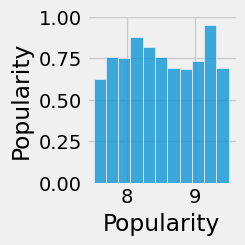

In [15]:
sn.pairplot(destinations.drop(columns= ['DestinationID']));

Null values

In [16]:
destinations.isnull().sum()

DestinationID      0
Name               0
State              0
Type               0
Popularity         0
BestTimeToVisit    0
dtype: int64

Check the columns

In [18]:
destinations.columns

Index(['DestinationID', 'Name', 'State', 'Type', 'Popularity',
       'BestTimeToVisit'],
      dtype='object')

In [28]:
destinations['DestinationID']

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: DestinationID, Length: 1000, dtype: int64

In [27]:
len(destinations['DestinationID'].unique())

1000

In [30]:
destinations['Name']

0              Taj Mahal
1            Goa Beaches
2            Jaipur City
3      Kerala Backwaters
4             Leh Ladakh
             ...        
995            Taj Mahal
996          Goa Beaches
997          Jaipur City
998    Kerala Backwaters
999           Leh Ladakh
Name: Name, Length: 1000, dtype: object

In [31]:
len(destinations['Name'].unique())

5

In [32]:
destinations['Name'].unique()

array(['Taj Mahal', 'Goa Beaches', 'Jaipur City', 'Kerala Backwaters',
       'Leh Ladakh'], dtype=object)

In [34]:
destinations['State'].unique()

array(['Uttar Pradesh', 'Goa', 'Rajasthan', 'Kerala', 'Jammu and Kashmir'],
      dtype=object)

In [43]:
destinations.iloc[: 5]

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [44]:
destinations['Name'].value_counts()

Name
Taj Mahal            200
Goa Beaches          200
Jaipur City          200
Kerala Backwaters    200
Leh Ladakh           200
Name: count, dtype: int64

In [45]:
destinations['State'].value_counts()

State
Uttar Pradesh        200
Goa                  200
Rajasthan            200
Kerala               200
Jammu and Kashmir    200
Name: count, dtype: int64

In [46]:
destinations['Type'].value_counts()

Type
Historical    200
Beach         200
City          200
Nature        200
Adventure     200
Name: count, dtype: int64

In [40]:
destinations['Type']

0      Historical
1           Beach
2            City
3          Nature
4       Adventure
          ...    
995    Historical
996         Beach
997          City
998        Nature
999     Adventure
Name: Type, Length: 1000, dtype: object

In [41]:
destinations['Type'].unique()

array(['Historical', 'Beach', 'City', 'Nature', 'Adventure'], dtype=object)

In [48]:
destinations['BestTimeToVisit'].unique()

array(['Nov-Feb', 'Nov-Mar', 'Oct-Mar', 'Sep-Mar', 'Apr-Jun'],
      dtype=object)

In [49]:
destinations['BestTimeToVisit'].value_counts()

BestTimeToVisit
Nov-Feb    200
Nov-Mar    200
Oct-Mar    200
Sep-Mar    200
Apr-Jun    200
Name: count, dtype: int64

In [50]:
destinations.head()

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal,Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches,Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City,Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters,Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh,Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [119]:
destinations['Name-State']= destinations['Name'] + '-' + destinations['State']
destinations.drop(columns= ['Name', 'State'], inplace= True)
destinations.head()

,DestinationID,Type,Popularity,BestTimeToVisit,Name-State
0,1,Historical,8.691906,Nov-Feb,Taj Mahal-Uttar Pradesh
1,2,Beach,8.605032,Nov-Mar,Goa Beaches-Goa
2,3,City,9.225372,Oct-Mar,Jaipur City-Rajasthan
3,4,Nature,7.977386,Sep-Mar,Kerala Backwaters-Kerala
4,5,Adventure,8.399822,Apr-Jun,Leh Ladakh-Jammu and Kashmir


In [120]:
columns= destinations.columns.to_list()
ls= [columns[0], columns[-1], columns[1], columns[2], columns[3]]
columns= ls
destinations= destinations[columns]
destinations.head()

,DestinationID,Name-State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal-Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches-Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City-Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters-Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh-Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [124]:
destinations.groupby(['Name-State'])['Popularity'].mean().reset_index().sort_values(by= 'Name-State')

,Name-State,Popularity
0,Goa Beaches-Goa,8.495206
1,Jaipur City-Rajasthan,8.530317
2,Kerala Backwaters-Kerala,8.490535
3,Leh Ladakh-Jammu and Kashmir,8.504099
4,Taj Mahal-Uttar Pradesh,8.549476


In [125]:
average_popularity= destinations.groupby(['Name-State'])['Popularity'].mean().reset_index().sort_values(by= 'Name-State')['Popularity'].values
average_popularity

array([8.49520572, 8.53031711, 8.490535  , 8.50409875, 8.54947627])

In [126]:
destinations= destinations.iloc[ : 5]
destinations

,DestinationID,Name-State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal-Uttar Pradesh,Historical,8.691906,Nov-Feb
1,2,Goa Beaches-Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City-Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters-Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh-Jammu and Kashmir,Adventure,8.399822,Apr-Jun


In [128]:
destinations.sort_values(by= 'Name-State', inplace= True)
destinations

,DestinationID,Name-State,Type,Popularity,BestTimeToVisit
1,2,Goa Beaches-Goa,Beach,8.605032,Nov-Mar
2,3,Jaipur City-Rajasthan,City,9.225372,Oct-Mar
3,4,Kerala Backwaters-Kerala,Nature,7.977386,Sep-Mar
4,5,Leh Ladakh-Jammu and Kashmir,Adventure,8.399822,Apr-Jun
0,1,Taj Mahal-Uttar Pradesh,Historical,8.691906,Nov-Feb


In [129]:
destinations['Popularity']= average_popularity

In [131]:
destinations.sort_index(inplace= True)

In [132]:
destinations

,DestinationID,Name-State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal-Uttar Pradesh,Historical,8.549476,Nov-Feb
1,2,Goa Beaches-Goa,Beach,8.495206,Nov-Mar
2,3,Jaipur City-Rajasthan,City,8.530317,Oct-Mar
3,4,Kerala Backwaters-Kerala,Nature,8.490535,Sep-Mar
4,5,Leh Ladakh-Jammu and Kashmir,Adventure,8.504099,Apr-Jun


----

# Users

In [64]:
users= Users.copy()

In [65]:
users.head()

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2


In [133]:
users.shape

(999, 7)

In [134]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            999 non-null    int64 
 1   Name              999 non-null    object
 2   Email             999 non-null    object
 3   Preferences       999 non-null    object
 4   Gender            999 non-null    object
 5   NumberOfAdults    999 non-null    int64 
 6   NumberOfChildren  999 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [135]:
users.describe()

,UserID,NumberOfAdults,NumberOfChildren
count,999.000000,999.000000,999.000000
mean,500.000000,1.504505,0.981982
std,288.530761,0.500230,0.811784
min,1.000000,1.000000,0.000000
25%,250.500000,1.000000,0.000000
50%,500.000000,2.000000,1.000000
75%,749.500000,2.000000,2.000000
max,999.000000,2.000000,2.000000


In [136]:
users.columns

Index(['UserID', 'Name', 'Email', 'Preferences', 'Gender', 'NumberOfAdults',
       'NumberOfChildren'],
      dtype='object')

In [140]:
len(users['UserID'].unique())

999

In [141]:
users['Name']

0       Kavya
1       Rohan
2       Kavya
3       Anika
4       Tanvi
        ...  
994     Karan
995     Dhruv
996     Karan
997    Aditya
998    Hitesh
Name: Name, Length: 999, dtype: object

In [142]:
users['Name'].unique()

array(['Kavya', 'Rohan', 'Anika', 'Tanvi', 'Karan', 'Vivaan', 'Riya',
       'Dhruv', 'Meera', 'Aanya', 'Arjun', 'Diya', 'Ritvik', 'Aarav',
       'Aditya', 'Ishaan', 'Pooja', 'Hitesh', 'Isha', 'Saanvi'],
      dtype=object)

In [144]:
users['Email'].unique()

array(['kavya@example.com', 'rohan@example.com', 'anika@example.com',
       'tanvi@example.com', 'karan@example.com', 'vivaan@example.com',
       'riya@example.com', 'dhruv@example.com', 'meera@example.com',
       'aanya@example.com', 'arjun@example.com', 'diya@example.com',
       'ritvik@example.com', 'aarav@example.com', 'aditya@example.com',
       'ishaan@example.com', 'pooja@example.com', 'hitesh@example.com',
       'isha@example.com', 'saanvi@example.com'], dtype=object)

In [146]:
users['Preferences'].unique()

array(['Beaches, Historical', 'Nature, Adventure', 'City, Historical'],
      dtype=object)

In [154]:
users

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2
...,...,...,...,...,...,...,...
994,995,Karan,karan@example.com,"Nature, Adventure",Male,1,0
995,996,Dhruv,dhruv@example.com,"City, Historical",Male,1,1
996,997,Karan,karan@example.com,"Beaches, Historical",Male,1,2
997,998,Aditya,aditya@example.com,"Nature, Adventure",Male,1,1


----

# Reviews

In [156]:
reviews= Reviews.copy()

In [157]:
reviews.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,178,327,2,Incredible monument!
1,2,411,783,1,Loved the beaches!
2,3,927,12,2,A historical wonder
3,4,358,959,3,Incredible monument!
4,5,989,353,2,Loved the beaches!


In [158]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ReviewID       999 non-null    int64 
 1   DestinationID  999 non-null    int64 
 2   UserID         999 non-null    int64 
 3   Rating         999 non-null    int64 
 4   ReviewText     999 non-null    object
dtypes: int64(4), object(1)
memory usage: 39.1+ KB


In [159]:
reviews.describe()

,ReviewID,DestinationID,UserID,Rating
count,999.000000,999.000000,999.000000,999.000000
mean,500.000000,506.392392,498.610611,3.023023
std,288.530761,285.604889,286.963411,1.419331
min,1.000000,1.000000,2.000000,1.000000
25%,250.500000,273.000000,252.000000,2.000000
50%,500.000000,501.000000,494.000000,3.000000
75%,749.500000,752.000000,747.500000,4.000000
max,999.000000,1000.000000,999.000000,5.000000


In [160]:
reviews['DestinationID']

0      178
1      411
2      927
3      358
4      989
      ... 
994    231
995    140
996    823
997    279
998    705
Name: DestinationID, Length: 999, dtype: int64

In [162]:
reviews['DestinationID']= reviews['DestinationID'].apply(lambda x : x % 5)

In [163]:
reviews.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,3,327,2,Incredible monument!
1,2,1,783,1,Loved the beaches!
2,3,2,12,2,A historical wonder
3,4,3,959,3,Incredible monument!
4,5,4,353,2,Loved the beaches!


In [168]:
len(reviews['UserID'].unique())

624

In [165]:
reviews['ReviewText'].unique()

array(['Incredible monument!', 'Loved the beaches!',
       'A historical wonder'], dtype=object)

In [166]:
reviews.head()

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,3,327,2,Incredible monument!
1,2,1,783,1,Loved the beaches!
2,3,2,12,2,A historical wonder
3,4,3,959,3,Incredible monument!
4,5,4,353,2,Loved the beaches!


----

# History

In [170]:
history= History.copy()

In [172]:
history.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,760,2024-01-01,3
1,2,184,532,2024-02-15,5
2,3,897,786,2024-03-20,2
3,4,470,660,2024-01-01,1
4,5,989,389,2024-02-15,4


In [173]:
history.shape

(999, 5)

In [174]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HistoryID         999 non-null    int64 
 1   UserID            999 non-null    int64 
 2   DestinationID     999 non-null    int64 
 3   VisitDate         999 non-null    object
 4   ExperienceRating  999 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 39.1+ KB


In [175]:
history.describe()

,HistoryID,UserID,DestinationID,ExperienceRating
count,999.000000,999.000000,999.000000,999.000000
mean,500.000000,497.216216,493.551552,2.904905
std,288.530761,290.579414,296.684196,1.397810
min,1.000000,1.000000,2.000000,1.000000
25%,250.500000,258.500000,236.000000,2.000000
50%,500.000000,497.000000,472.000000,3.000000
75%,749.500000,752.000000,760.500000,4.000000
max,999.000000,999.000000,1000.000000,5.000000


In [176]:
history.columns

Index(['HistoryID', 'UserID', 'DestinationID', 'VisitDate',
       'ExperienceRating'],
      dtype='object')

In [179]:
history['DestinationID']= history['DestinationID'].apply(lambda x : x % 5)

In [183]:
history['VisitDate']= pd.to_datetime(history['VisitDate'])

In [184]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   HistoryID         999 non-null    int64         
 1   UserID            999 non-null    int64         
 2   DestinationID     999 non-null    int64         
 3   VisitDate         999 non-null    datetime64[ns]
 4   ExperienceRating  999 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 39.1 KB


In [190]:
history['VisitDate'].dt.year.unique()

array([2024])

In [191]:
history['VisitDate'].dt.month.unique()

array([1, 2, 3])

In [192]:
history['VisitDate'].dt.day.unique()

array([ 1, 15, 20])

In [193]:
history.head()

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,0,2024-01-01,3
1,2,184,2,2024-02-15,5
2,3,897,1,2024-03-20,2
3,4,470,0,2024-01-01,1
4,5,989,4,2024-02-15,4


----

# Final datasets

In [194]:
destinations

,DestinationID,Name-State,Type,Popularity,BestTimeToVisit
0,1,Taj Mahal-Uttar Pradesh,Historical,8.549476,Nov-Feb
1,2,Goa Beaches-Goa,Beach,8.495206,Nov-Mar
2,3,Jaipur City-Rajasthan,City,8.530317,Oct-Mar
3,4,Kerala Backwaters-Kerala,Nature,8.490535,Sep-Mar
4,5,Leh Ladakh-Jammu and Kashmir,Adventure,8.504099,Apr-Jun


In [199]:
destinations.to_csv('Final Datasets/Destinations.csv', index= False)

In [195]:
users

,UserID,Name,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,Kavya,kavya@example.com,"Beaches, Historical",Female,1,0
1,2,Rohan,rohan@example.com,"Nature, Adventure",Male,2,2
2,3,Kavya,kavya@example.com,"City, Historical",Female,2,0
3,4,Anika,anika@example.com,"Beaches, Historical",Female,1,0
4,5,Tanvi,tanvi@example.com,"Nature, Adventure",Female,2,2
...,...,...,...,...,...,...,...
994,995,Karan,karan@example.com,"Nature, Adventure",Male,1,0
995,996,Dhruv,dhruv@example.com,"City, Historical",Male,1,1
996,997,Karan,karan@example.com,"Beaches, Historical",Male,1,2
997,998,Aditya,aditya@example.com,"Nature, Adventure",Male,1,1


In [200]:
users.to_csv('Final Datasets/Users.csv', index= False)

In [196]:
reviews

,ReviewID,DestinationID,UserID,Rating,ReviewText
0,1,3,327,2,Incredible monument!
1,2,1,783,1,Loved the beaches!
2,3,2,12,2,A historical wonder
3,4,3,959,3,Incredible monument!
4,5,4,353,2,Loved the beaches!
...,...,...,...,...,...
994,995,1,346,5,Loved the beaches!
995,996,0,140,3,A historical wonder
996,997,3,858,5,Incredible monument!
997,998,4,839,2,Loved the beaches!


In [201]:
reviews.to_csv('Final Datasets/Reviews.csv', index= False)

In [197]:
history

,HistoryID,UserID,DestinationID,VisitDate,ExperienceRating
0,1,525,0,2024-01-01,3
1,2,184,2,2024-02-15,5
2,3,897,1,2024-03-20,2
3,4,470,0,2024-01-01,1
4,5,989,4,2024-02-15,4
...,...,...,...,...,...
994,995,129,0,2024-02-15,3
995,996,634,4,2024-03-20,3
996,997,831,3,2024-01-01,1
997,998,959,0,2024-02-15,4


In [202]:
history.to_csv('Final Datasets/History.csv', index= False)